In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('car_details_ford_focus.csv')

In [2]:
# Model Development
# How can you determine a fair value for a used car?

In [3]:
# A model can be thought of as a mathematical equation used to predict a value given one or more other values
# Relating one or more independent variables to dependent variables.

In [4]:
# Simple and Multiple Linear Regression, Model Evaluation using Visualization, Polynomial Regression and Pipelines
# R-squared and MSE for In-Sample Evaluation

In [5]:
# Linear Regression and Multiple Linear Regression
# Simple Linear Regression
# - The predictor(independent) variable -x
# - The target ( dependent ) variable - y
# y = b0 + b1x. -> b0: the intercept, b1: the slope

In [6]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [7]:
X = df[['year']]
Y = df['price']
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
Yhat = lm.predict(X)
Yhat[0:10]

array([ 69.05930225,  85.92099881,  97.16212985,  52.1976057 ,
        35.33590914,  74.67986777, 102.78269537, 119.64439192,
       108.40326088,  74.67986777])

In [20]:
df['price'].head(10).tolist()

[61.75, 96.95, 86.9, 52.9, 37.9, 62.0, 83.5, 135.0, 121.75, 71.75]

In [11]:
lm.intercept_

-11222.656825136177

In [12]:
lm.coef_

array([5.62056552])

In [21]:
# y = b0 + b1x1 + b2x2 + b3x3 + b4x4
X = df[['cc', 'km', 'hp', 'year']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
Yhat = lm.predict(X)
Yhat[0:10]

array([ 67.0560831 ,  96.33843821,  99.49867264,  56.27759071,
        26.57346007,  62.43583121,  84.99492741, 125.02435017,
       114.30390148,  80.06331398])

In [22]:
lm.intercept_

-8163.130897369166

In [23]:
lm.coef_

array([-0.01776638, -0.12028541,  0.30109156,  4.10611076])

In [27]:
lm.score(X, Y)

0.86263040425544

In [28]:
# Model Evaluation using Visualization

# Why use regression plot ?
# It gives us a good estimate of
# - The relationship between two variables
# - The strength of the correlation
# - The directionof the relationship (positive or negative)

(0, 212.19237064002036)

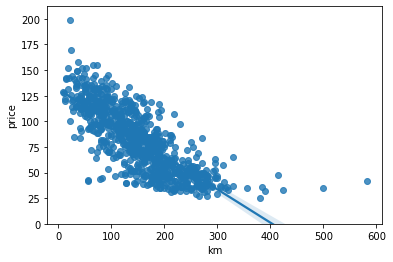

In [29]:
# Shows us combination of Scatter plot and fitted linear regression line
sns.regplot(x="km", y="price", data=df)
plt.ylim(0,)

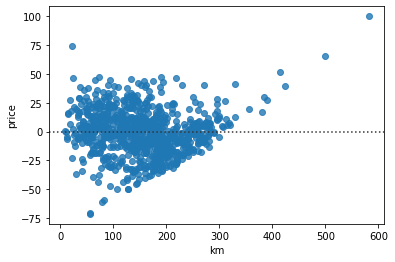

In [30]:
# Residual plot
# Randomly spread out around x-axis then a linear model is appropriate
sns.residplot(df['km'], df['price'])

In [32]:
# Distribution Plots
# Good for with multiple variables
# Compare :
# - The fitted values that result from the model
# - The actual values

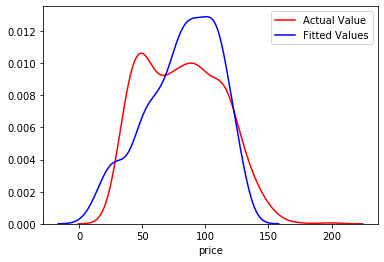

In [33]:
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values", ax=ax1)
# Seems we don't have enough examples with high price.

In [34]:
# Polynomial Regression and Pipelines
# Linear model can be a bad fit model.
# It's special case of the general linear regression model
# Useful for describing curvilinear relationships
# - Curvilinear relationships : By squaring or setting highe-order terms of the predictor variables

# Model can be quadratic:
# - y = b0 + b1x1 + b2(x1)^2
# can be cubic or higher order polynomial regression too

In [38]:
f = np.polyfit(df['year'], df['price'], 3)
p = np.poly1d(f)
p

poly1d([ 7.76535996e-03, -4.64723737e+01,  9.27061046e+04, -6.16455575e+07])

In [41]:
# for multivariable, we use scikitlearn
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2)
x_polly = pr.fit_transform(df[['hp', 'km', 'cc']])
x_polly

array([[1.000000e+00, 1.150000e+02, 2.100000e+02, ..., 4.410000e+04,
        3.351600e+05, 2.547216e+06],
       [1.000000e+00, 1.250000e+02, 9.400000e+01, ..., 8.836000e+03,
        1.500240e+05, 2.547216e+06],
       [1.000000e+00, 1.250000e+02, 1.360000e+02, ..., 1.849600e+04,
        2.170560e+05, 2.547216e+06],
       ...,
       [1.000000e+00, 9.500000e+01, 5.700000e+01, ..., 3.249000e+03,
        8.892000e+04, 2.433600e+06],
       [1.000000e+00, 1.130000e+02, 1.360000e+02, ..., 1.849600e+04,
        1.972000e+05, 2.102500e+06],
       [1.000000e+00, 9.500000e+01, 8.700000e+01, ..., 7.569000e+03,
        1.357200e+05, 2.433600e+06]])

In [42]:
# Pre-Processing
# We can normalize the each feature simultaneously
from sklearn.preprocessing import StandardScaler
SCALE = StandardScaler()
SCALE.fit(df[['hp', 'km', 'cc']])
x_scale = SCALE.transform(df[['hp', 'km', 'cc']]),
x_scale

(array([[ 0.63715938,  0.78140619,  0.46909272],
        [ 1.51347871, -0.77767851,  0.46909272],
        [ 1.51347871, -0.21318232,  0.46909272],
        ...,
        [-1.11547927, -1.27497276, -0.03416224],
        [ 0.46189552, -0.21318232, -1.57188573],
        [-1.11547927, -0.8717612 , -0.03416224]]),)

In [43]:
# Pipelines
# There are many steps to getting a prediction :
# - Normalization, Polynomial transform, Linear Regression
# Simplify using a Pipeline

from sklearn.pipeline import Pipeline
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)), ('mode', LinearRegression())]
pipe = Pipeline(Input)

In [46]:
pipe.fit(df[['hp','cc','km','year']], df['price'])
Yhat = pipe.predict(df[['hp','cc','km','year']])
Yhat[0:10]

array([ 59.31061765,  82.31713821,  92.55678101,  49.95758371,
        36.6870379 ,  59.49249779,  90.10016706, 140.22179607,
       120.12332482,  70.53586393])

In [47]:
pipe.score(df[['hp','cc','km','year']], df['price'])

0.9140388804066443

In [48]:
# Measures for In-Sample Evaluation
# A way to numerically determine how good the model fits on dataset.
# Two important measures to determine the fit of model :
# - Mean Squared Error (MSE)
# - R-squared(R^2)

In [49]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df['price'], Yhat)

83.25927777682598

In [50]:
# R-squared also called as Coefficient of Determination
# Is a measure to determine how close the data is to the fitted regression line
# R^2: the percentage of variation of the target variable(Y) that is explained by the linear model.

# Think about as comparing a regression model to a simple model i.e the mean of the data points

In [52]:
# lm.score or pipe.score are R-squared score

In [53]:
# Prediction and Decision Making
# - we look at combination of :
# -- Do the predicted values make sense
# -- Visualization
# -- Numerical measures for evaluation
# -- Comparing models

In [57]:
X = df[['year']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.predict([[2012]])

array([85.92099881])

In [65]:
X = df[['cc', 'km', 'hp', 'year']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.predict([[1596, 115, 125, 2011]])

array([89.7063339])

In [68]:
new_input = np.arange(1,101,1).reshape(-1,1)

In [69]:
# Comparing MLR and SLR
# - Is a lower MSE always implying a better fit ? -> Not necessarily.
# - MSE for an MLR model will be smallar than the MSE for an SLR model, since the errors of the data will decrease
#    when more variables are included in the model.
# - Polynomial regression will also have a smaller MSE then regular regression
# - A similar inverse relationship holds for R^2